<a href="https://colab.research.google.com/github/Kasi-redddy/00_pytorch_fundamentals/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyTorch Workflow

let's explore an example PyTorch end-to-end workflow

In [ ]:
what_were_covering = {1:"data(prepare and load )",
                      2:"build model",
                      3:"fitting the model to data (training)",
                      4:"making predictions and evaluting a model (inference)",
                      5:"saving and loading a model",
                      6:"putting it all together"}

what_were_covering


{1: 'data(prepare and load )',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluting a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn  #nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt


# check pytorch version
torch.__version__

'2.5.0+cu121'

### Data (Preparing and Loading)

Data can be anything .. in machine learning..

* Excel speadsheet
* Images of any kind
* Veidoes (Youtube has lot's of data..)
* Auido like songs or poadcasts
* DNA
* Text

Machine Learning is a game of two parts:

  1.Get data into numerical representation.

  2.Build a model to learn patterns in numerical representation.


To showcase this, let's create some *known* data using the linear regression formula.

We'll use linear regression formula to make a staright line with *known* **parameters.**

In [ ]:
# create *known* parameters
weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight *X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### Splliting data into training and test sets(one of the most important concepts in machine learning in general)


let's create a training and test with our data.



In [ ]:
# Create a train/test split
train_split = int(0.8 *len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, and visualize!"

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots trainig data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  #Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  # Are there predictions?
  if predictions is not None:

    plt.scatter(test_data, predictions,  c="r", s=4, label="Predictions")

  #show the legend
  plt.legend(prop={"size":14});





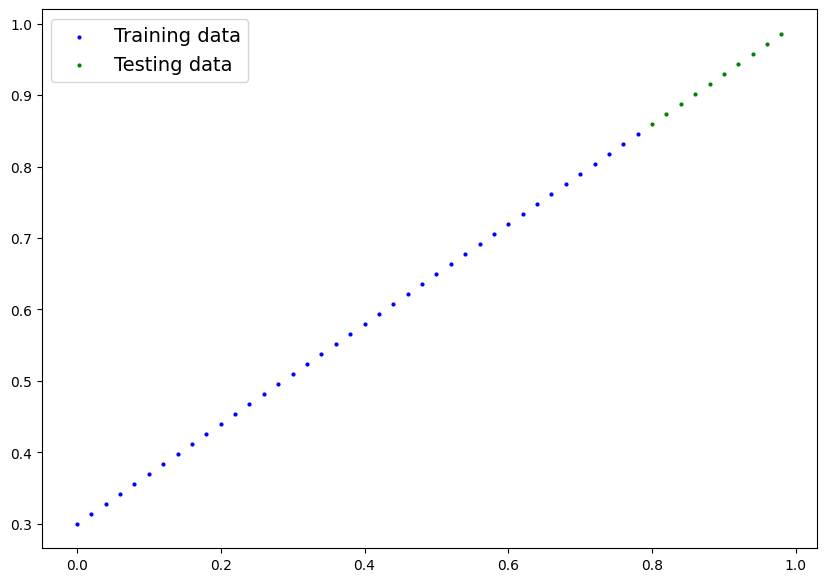

In [ ]:
plot_predictions();

## 2.Building model
Our first PyTorch model!

This is very exciting ...let's do it



It has two main algorithms:
  
  1.Gradient descent
  
  2.Backpropagation


In [ ]:
from torch import nn

#Create linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__ (self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype = torch.float))
  #Forward method to define the computation in the model
  def forward (self, x: torch.Tensor) ->torch.Tensor:
     return self.weights * x + self.bias  # this is regression formula.


### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considred a computational graph)


* torch.nn.parameter - waht parameter should our model try and learn, often a pytorch layer from torch.nn will set these for us

* torch.nn.module- the base class for all neural network modules, if you subclass it, you should overwrite forward()


* torch.optim - this where the optimizers in pytorch live, they will help with gradient descent
* def forward() - All nn.module subclasses require you to overwrite forward(), this method defines what happens in the forward computations.

### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside..

So we can check our model parameters or what's inside our model using `.parameters().`

In [ ]:
# Create a random seed
torch.manual_seed(42)

# create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

#Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameterrs
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

### Makng  predictions using  `torch. inference_mode()`.

To check our model predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model it's going to run it through the `forward()` method

In [ ]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [ ]:
# Make the predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

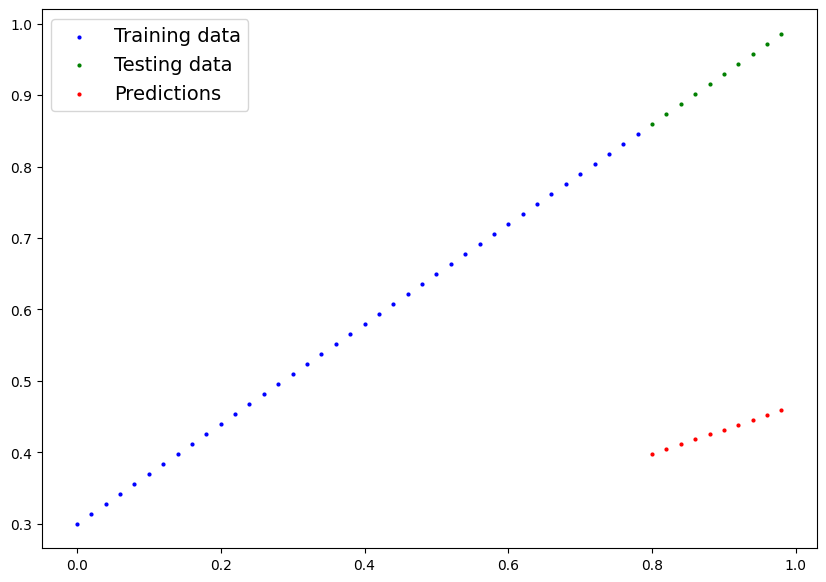

In [ ]:
plot_predictions(predictions= y_preds)

## 3.Train Model

The whole idea of trining is for a model to move from some *unknown*  parameters( these may be random) to some *known* parameters.



or in other words from a poor representation of data to a better representation of data.


One way to measure how poor or how wrong your models predictions are os to use a loss function.

* Note: Loss function may also be called cost function or critreian in differnt areas. for our case , we're going to refer to it as a loss function.

Things we need to train.

*   **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

*   **Optimizer:**Takes into accounts the loss of a model and adjust the model's parameters(e.g. weight & bias in our case) to improve the loss function.

And  specifically for pytorch, we need:
* A training loop
* A testing loop



In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# set up loss function
loss_fn  = nn.L1Loss()

# Setup ann optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr=0.01)  #lr = learning rate = possibly the msot important hyperparameter you can set


In [ ]:
loss_fn

L1Loss()

### Building a traing loop(and a testing loop ) in pytorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass - it will moves the data. to make predictions on data called forward propagation
2. calculate the loss
3. optimizer zero grad
4. Loss backward - moves backwards through network to calaculte each parameter of the loss(**backpropagation**)
5. Optimizer - use optimizer to adjust our models parameter to try and improve the loss (**gradient descent**)

In [ ]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.024458957836031914 | MAE Test Loss: 0.05646304413676262 
Epoch: 10 | MAE Train Loss: 0.021020207554101944 | MAE Test Loss: 0.04819049686193466 
Epoch: 20 | MAE Train Loss: 0.01758546568453312 | MAE Test Loss: 0.04060482233762741 
Epoch: 30 | MAE Train Loss: 0.014155393466353416 | MAE Test Loss: 0.03233227878808975 
Epoch: 40 | MAE Train Loss: 0.010716589167714119 | MAE Test Loss: 0.024059748277068138 
Epoch: 50 | MAE Train Loss: 0.0072835334576666355 | MAE Test Loss: 0.016474086791276932 
Epoch: 60 | MAE Train Loss: 0.0038517764769494534 | MAE Test Loss: 0.008201557211577892 
Epoch: 70 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 80 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 90 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 


In [ ]:
import numpy as np

# Convert the train and test loss values to numpy arrays if needed
train_loss_np = np.array(train_loss_values)
test_loss_np = np.array(test_loss_values)

train_loss_np, test_loss_np


(array([0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 array([0.05646304, 0.0481905 , 0.04060482, 0.03233228, 0.02405975,
        0.01647409, 0.00820156, 0.00502309, 0.00502309, 0.00502309],
       dtype=float32))

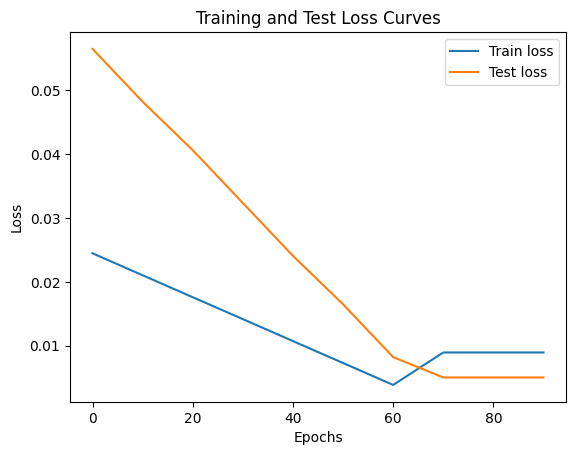

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the loss curves
plt.plot(epoch_count, np.array(train_loss_values), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()


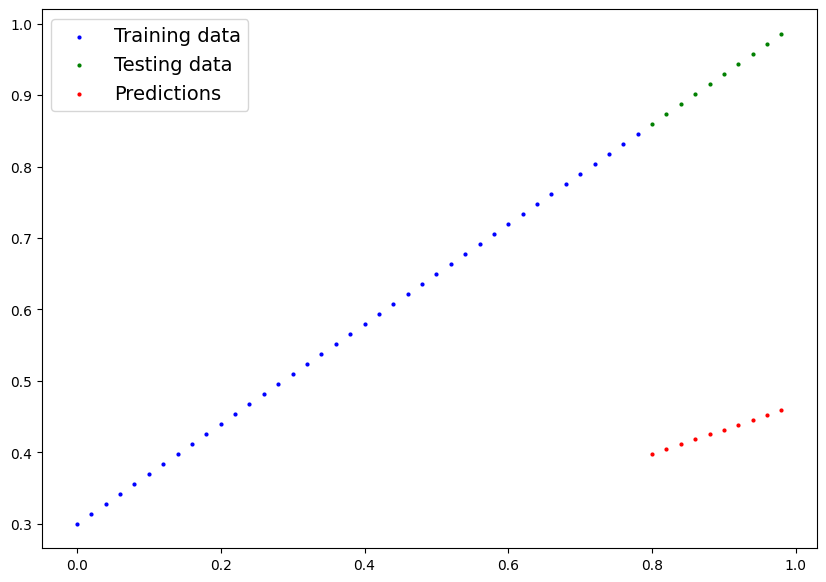

In [ ]:
plot_predictions(predictions=y_preds);

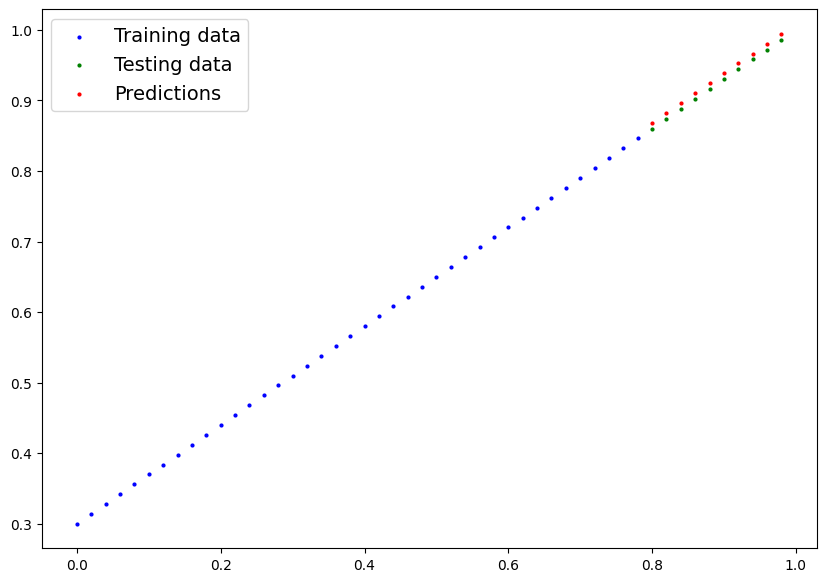

In [ ]:
# Ensure model is in evaluation mode
model_0.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds_new = model_0(X_test)  # X_test should be defined as your test dataset

# Plot the predictions
plot_predictions(predictions=y_preds_new)


In [ ]:
model_0

LinearRegressionModel()

### saving a model in pyTorch

There are three main methods you should about for saving and loading models in PyTorch'

1. `torch.save()` - allows you to save a PyTorch in python's *pickle* format.
2. `torch.load()` - allows to load saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows  to load a model's saved state dictionary

In [ ]:
!pip install pathlib

In [ ]:
# Saving our PyTorch model
from pathlib import Path  # Correct import

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save the model state dict
print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f= MODEL_SAVE_PATH)


saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Nov 10 09:20 01_pytorch_workflow_model_0.pth


## Loading  a PyTorch model

since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load saved `state_dict()` into that.

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# To load in saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

#load the saved state_dict of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-39-ace7125ee80c>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make the predictions with our loaded data
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds


tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
#make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# compare loaded model preds with orginal model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting all together

Let's go back through the steps above and see in all one place.

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

#vesion of PyTorch
torch.__version__


'2.5.0+cu121'

Create a device-agonostic code.

This means if we've got GPU access, our code will use it (to  run faster).

If no GPU avalible, the code will default to use CPU .



In [ ]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")


Using device: cpu


6.1 **Data**


In [ ]:

# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Now we've got some data, let's split it into training and test sets.

We'll use an 80/20 split with 80% training data and 20% testing data.

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

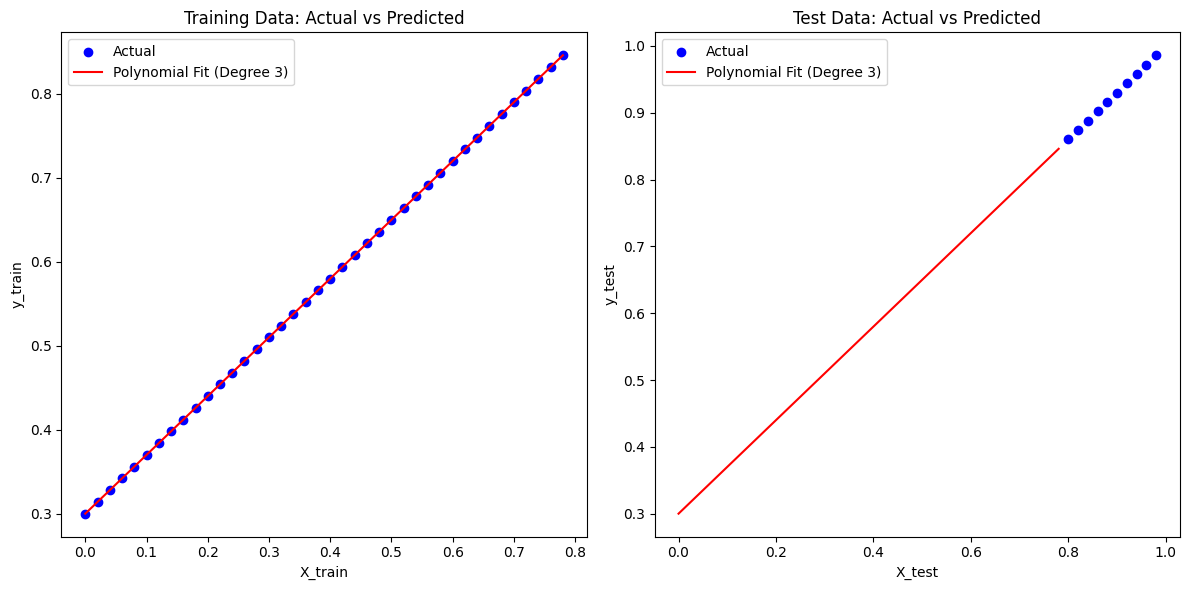

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Function to plot predictions (with polynomial fit)
def plot_predictions(X_train, y_train, X_test, y_test, model, poly_features, degree=2):
    # Transform the original data into polynomial features
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Predict values
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Create a smooth curve for the polynomial fit
    X_range = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
    X_range_poly = poly_features.transform(X_range)  # Apply polynomial transformation to X_range
    y_range_pred = model.predict(X_range_poly)

    # Plot training data and prediction
    plt.figure(figsize=(12, 6))

    # Training data plot
    plt.subplot(1, 2, 1)
    plt.scatter(X_train, y_train, color='blue', label='Actual')
    plt.plot(X_range, y_range_pred, color='red', label=f'Polynomial Fit (Degree {degree})')
    plt.title("Training Data: Actual vs Predicted")
    plt.xlabel('X_train')
    plt.ylabel('y_train')
    plt.legend()

    # Test data plot
    plt.subplot(1, 2, 2)
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_range, y_range_pred, color='red', label=f'Polynomial Fit (Degree {degree})')
    plt.title("Test Data: Actual vs Predicted")
    plt.xlabel('X_test')
    plt.ylabel('y_test')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage with Polynomial Regression:

# Assuming you already have X_train, y_train, X_test, y_test
# Ensure X_train and X_test are reshaped properly to 2D arrays if they are 1D
X_train = X_train.reshape(-1, 1)  # Reshape to 2D if necessary
X_test = X_test.reshape(-1, 1)    # Reshape to 2D if necessary

degree = 3  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)

# Fit a linear regression model on the polynomial features
model = LinearRegression()
model.fit(poly_features.fit_transform(X_train), y_train)

# Now, plot the predictions
plot_predictions(X_train, y_train, X_test, y_test, model, poly_features, degree)



6.2 **Building a PyTorch linear model**

We've got some data, now it's time to make a model.

We'll create the same style of model as before except this time, instead of defining the weight and bias parameters of our model manually using nn.Parameter(), we'll use nn.Linear(in_features, out_features) to do it for us.

Where in_features is the number of dimensions your input data has and out_features is the number of dimensions you'd like it to be output to.

In our case, both of these are 1 since our data has 1 input feature (X) per label (y).



In [ ]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always needed but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:

# Check model device
next(model_1.parameters()).device

device(type='cpu')

6.3 **Training**

Time to build a training and testing loop.

First we'll need a loss function and an optimizer.

Let's use the same functions we used earlier, nn.L1Loss() and torch.optim.SGD().

We'll have to pass the new model's parameters (model.parameters()) to the optimizer for it to adjust them during training.

The learning rate of 0.01 worked well before too so let's use that again.

In [ ]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)

PyTorch training loop steps

1. **Forward pass** - The model goes through all of the training data once, performing its forward() function calculations (model(x_train)).

2. **Calculate the loss** - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (loss = loss_fn(y_pred, y_train).

3. **Zero gradients** - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (optimizer.zero_grad()).

4. **Perform backpropagation on the loss** - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as

**backpropagation**, hence "backwards" (loss.backward()).

5. **Step the optimizer (gradient descent)** - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them (optimizer.step()).

In [24]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 100 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 200 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 300 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 400 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 500 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 600 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 700 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 800 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 900 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904


In [25]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [26]:
device

'cpu'

In [27]:
weight, bias

(0.7, 0.3)

# 6.4  Making and evaluting predictions

In [33]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

# 6.5 Saving and loading a model
We're happy with our models predictions, so let's save it to file so it can be used later.

In [40]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [41]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cpu


<ipython-input-41-c4e3cba863db>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


In [42]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])